In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler

In [117]:
df = pd.read_csv("/Users/raghavan/Downloads/creditcard.csv")

In [118]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check for null data

In [120]:
df.isnull().sum().max()

0

### Data is skewed

In [121]:
print ("No Frauds : " + str(round(df['Class'].value_counts()[0] * 100.00 /len(df),2)) + '% of the dataset')
print ("Frauds : " + str(round(df['Class'].value_counts()[1] * 100.00 /len(df),2)) + '% of the dataset')

No Frauds : 99.83% of the dataset
Frauds : 0.17% of the dataset


Text(0.5,1,'Class Distribution \n 0 : No Frauds | 1 : Frauds')

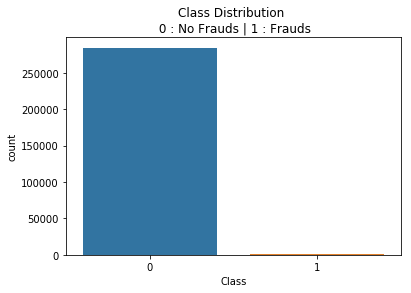

In [122]:
sns.countplot('Class',data=df)
plt.title("Class Distribution \n 0 : No Frauds | 1 : Frauds")

(0.0, 172792.0)

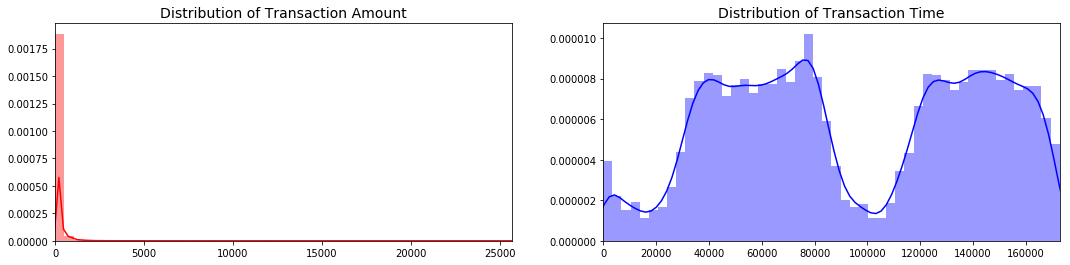

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

### We need to scale columns time and amount

In [124]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#df.drop(['Time','Amount'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

#Amount and Time are Scaled!

df.head()
df.drop(['Time','Amount'], axis=1, inplace=True)



In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print ("No Frauds : " + str(round(df['Class'].value_counts()[0] * 100.00 /len(df),2)) + '% of the dataset')
print ("Frauds : " + str(round(df['Class'].value_counts()[1] * 100.00 /len(df),2)) + '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ float(len(original_ytrain)))
print(test_counts_label/ float(len(original_ytest)))

No Frauds : 99.83% of the dataset
Frauds : 0.17% of the dataset
('Train:', array([265518, 180305,  42664, ...,  29062,  13766,  17677]), 'Test:', array([263020,  11378, 147283, ..., 274532, 269819,  64170]))
('Train:', array([ 72227, 114282,  16818, ..., 264471, 191914, 284017]), 'Test:', array([202638,  32978, 128121, ..., 244024, 127667,  48318]))
('Train:', array([ 20895, 114622, 167683, ..., 244502, 178972, 218506]), 'Test:', array([284352,  82483,  90981, ..., 171224, 168807, 271602]))
('Train:', array([122248, 181660, 194400, ..., 104631, 277586,  29432]), 'Test:', array([225673,  63348,  68025, ..., 279451,  77554,  76043]))
('Train:', array([241684, 223467, 136928, ...,  86495, 160550,  49633]), 'Test:', array([157557, 204860,  83760, ..., 251478, 178967, 216850]))
----------------------------------------------------------------------------------------------------
Label Distributions: 

[ 0.99827075  0.00172925]
[ 0.99827955  0.00172045]


### Create equal sample for both the classes

In [126]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
107314,4.108153,-0.168106,0.646328,-1.168349,-1.018701,0.344239,1.472588,3.917384,-0.493171,0.895084,...,0.615579,0.252849,0.055074,-0.441626,1.043454,0.683767,-0.241700,-0.003392,0.076309,0
102445,-0.293440,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
222695,0.011598,0.685993,-2.562057,2.160292,-0.194170,-0.631207,-1.617461,-0.649769,-1.033016,1.795863,...,-0.037235,0.275033,0.744160,-0.104302,0.029664,0.172602,0.657248,0.180065,0.104287,0
131272,-0.304618,-0.060527,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,...,0.732852,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1
219892,-0.296793,0.672388,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,...,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


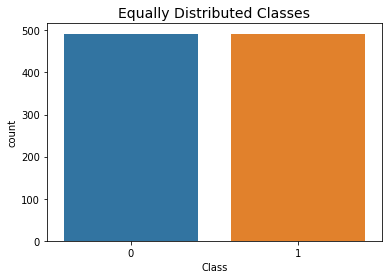

In [127]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()



### Correlation of features

Text(0.5,1,'Balanced Correlation Matrix ')

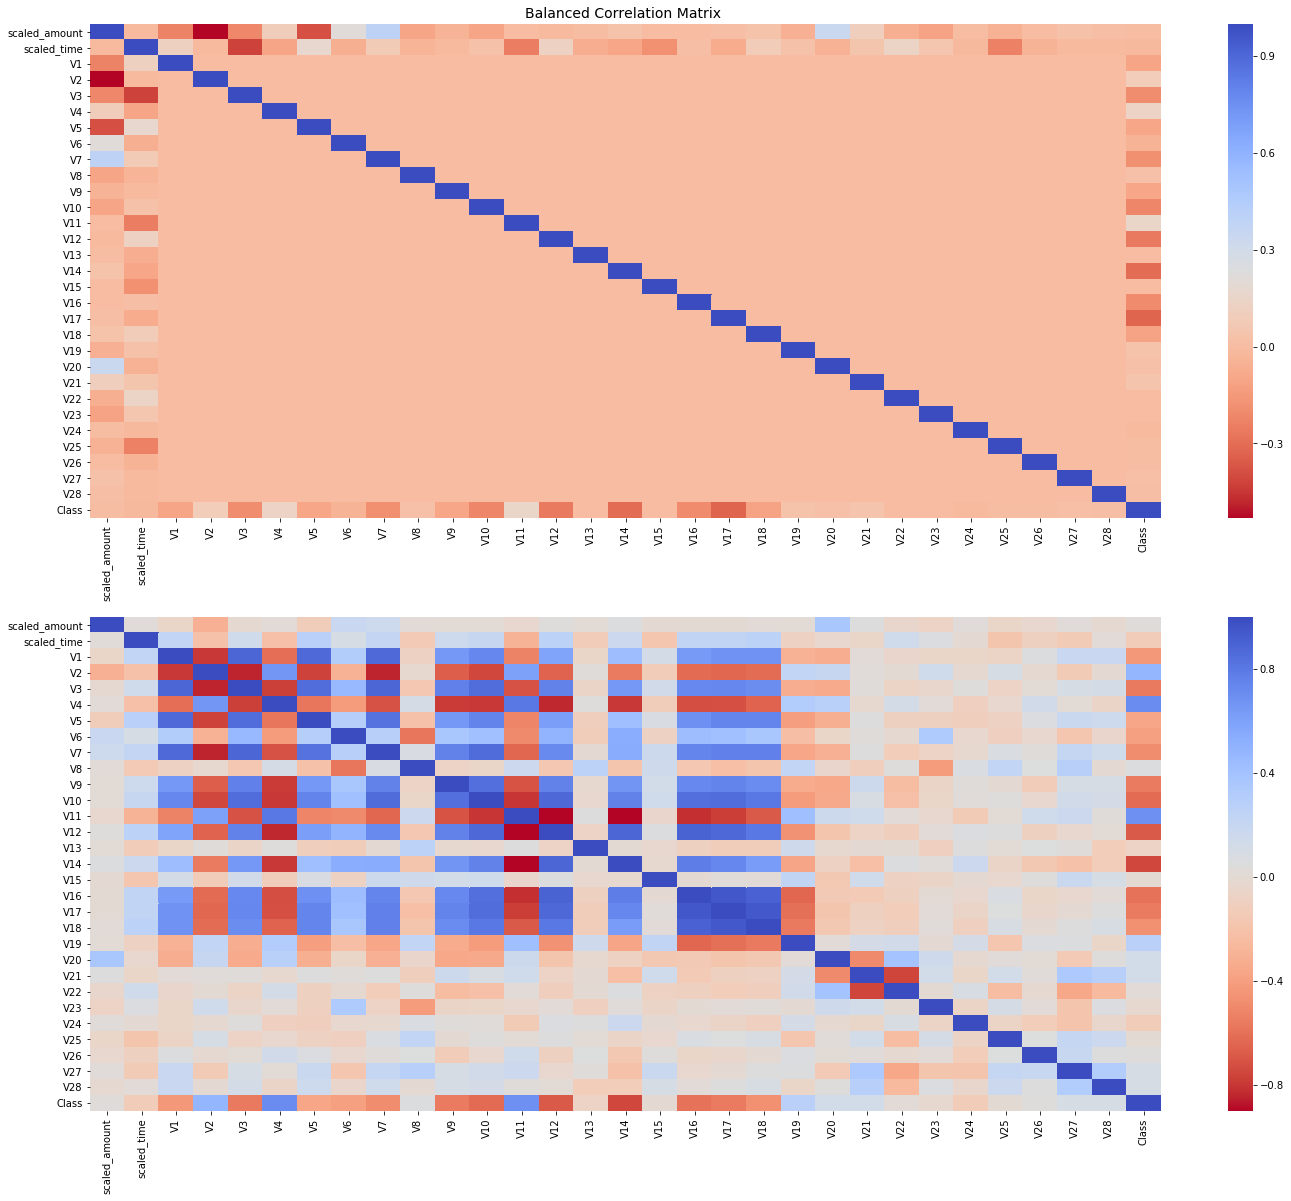

In [128]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix ", fontsize=14)

corr1 = new_df.corr()
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax1.set_title("Balanced Correlation Matrix ", fontsize=14)

* Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

* Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

### Negative correlated columns distributions

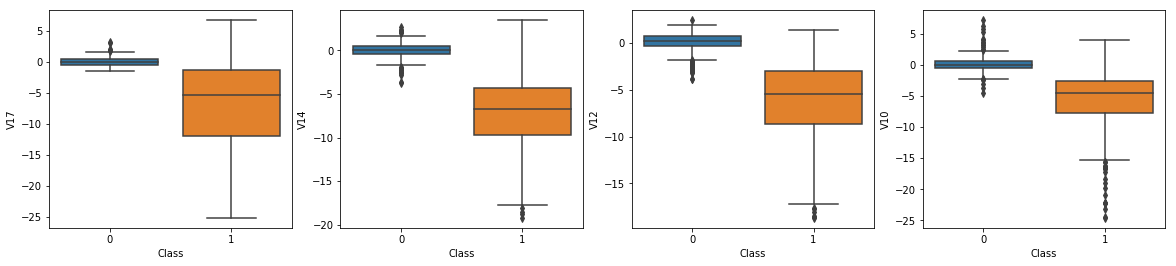

In [129]:
fig2 , axes = plt.subplots(ncols=4,nrows=1,figsize=(20,4))
negative_columns = ['V17', 'V14', 'V12' ,'V10']
indies = np.arange(0,4)

for i,col in zip(indies,negative_columns):
    sns.boxplot(ax=axes[i],x='Class',y=col,data=new_df)


### Positive corerelated columns distributions

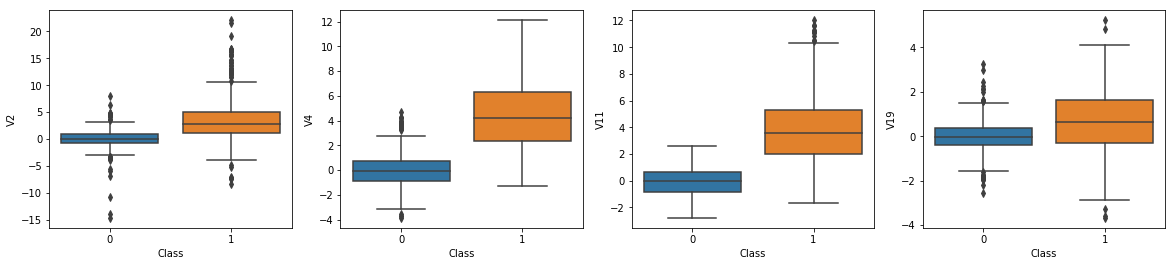

In [130]:
fig3 , axes = plt.subplots(ncols=4,nrows=1,figsize=(20,4))
positive_columns = ["V2", "V4", "V11","V19"]
indies = np.arange(0,4)

for i , col in zip(indies,positive_columns):
    sns.boxplot(ax=axes[i],x='Class',y=col,data=new_df)

### Removing the outliers

Text(0.5,1,'V14 Distribution \n (Fraud Transactions)')

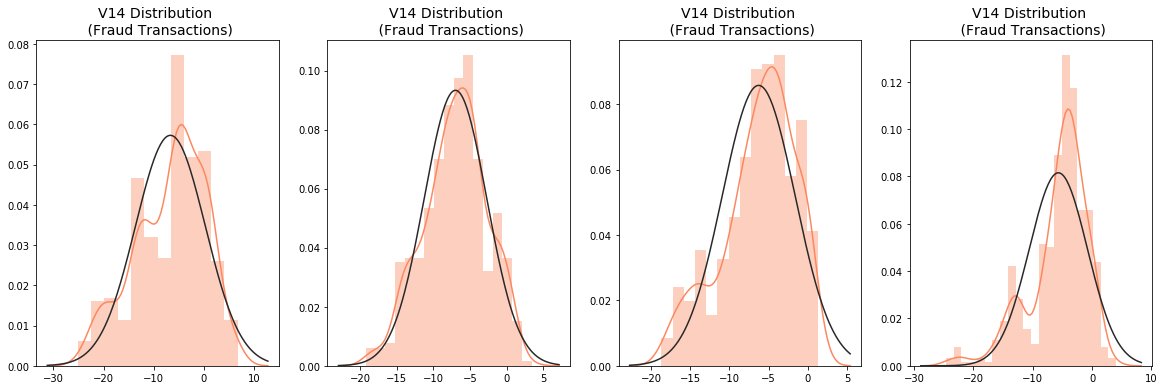

In [131]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v14_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

In [132]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] < v14_upper) & (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] < v12_upper) & (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] < v12_upper) & (new_df['V10'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.69272296497 | Quartile 75: -4.28282084949
iqr: 5.40990211549
Cut Off: 8.11485317323
V14 Lower: -17.8075761382
V14 Upper: 3.83203232374
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.493773355105301, -18.8220867423816, -18.049997689859396, -19.214325490261398]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.343037158
V12 Upper: 5.7769733849
V12 outliers: [-18.047596570821604, -18.553697009645802, -18.431131027999299, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.8988546323
V10 Upper: 4.92033495834
V10 outliers: [-16.255611749140101, -19.836148851695999, -23.22825483575

In [133]:
len(new_df['V14'])

965

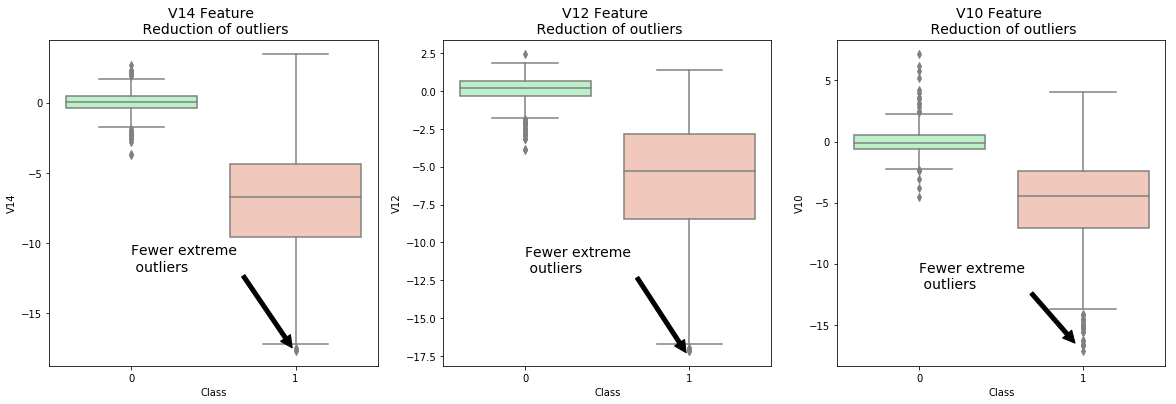

In [134]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### Dimentionality reduction and clustering

In [135]:
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,...,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,1.311211,0.031104,-2.158803,1.619102,-3.200250,2.121448,-1.434775,-0.722437,-2.361440,0.465208,...,0.161915,0.490225,-0.054875,-0.037380,-0.032750,0.045743,0.037473,0.123233,0.036611,0.490155
std,4.399880,0.567974,4.979894,3.369390,5.726620,3.067771,3.886462,1.671762,4.928034,4.313459,...,0.960881,2.435058,1.046314,1.172966,0.555788,0.664168,0.462117,0.827405,0.426401,0.500162
min,-0.307413,-0.993668,-30.552380,-14.633869,-31.103685,-3.870713,-22.105532,-6.406267,-23.928661,-37.353443,...,-4.128186,-6.389132,-8.887017,-19.254328,-2.028024,-4.781606,-1.390273,-6.327818,-3.375187,0.000000
25%,-0.281003,-0.460426,-2.830984,-0.180329,-4.871394,-0.219321,-1.730411,-1.462923,-2.814263,-0.192892,...,-0.188023,-0.158841,-0.546869,-0.223709,-0.375591,-0.297973,-0.274051,-0.058565,-0.053507,0.000000
50%,-0.027947,-0.083166,-0.809000,0.975153,-1.259820,1.227976,-0.454082,-0.654504,-0.647192,0.161064,...,0.013236,0.157335,-0.003762,-0.032977,0.011007,0.089942,-0.006810,0.041091,0.035124,0.000000
75%,1.089918,0.592147,1.036639,2.726800,0.354833,4.007683,0.460032,0.001302,0.298621,0.875478,...,0.395255,0.652683,0.540864,0.188731,0.380272,0.408814,0.331557,0.430564,0.208858,1.000000
max,61.977643,1.031544,2.305267,16.713389,3.280993,11.927512,11.095089,6.286734,16.303141,20.007208,...,9.221256,27.202839,2.941475,9.399660,1.371153,3.127398,2.745261,3.052358,2.051277,1.000000


In [136]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# New_df is from the random undersample data (fewer instances)
shuffle_df = new_df.sample(frac=1, random_state=42)
X = shuffle_df.drop('Class', axis=1)
y = shuffle_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))



T-SNE took 5.1 s
PCA took 0.0055 s
Truncated SVD took 0.0032 s


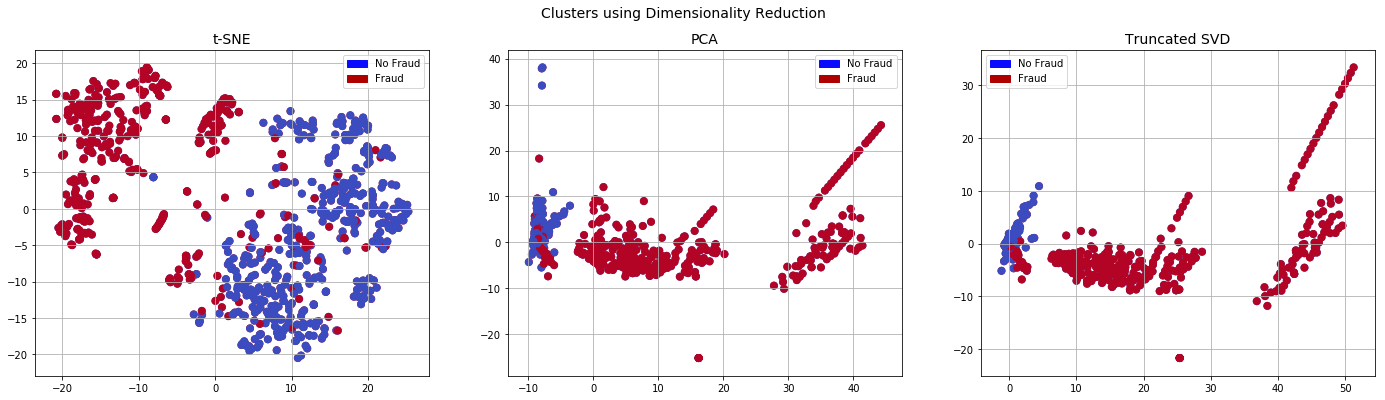

In [137]:
from matplotlib import patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [138]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [146]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


In [152]:
from sklearn.cross_validation import cross_val_score 

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', str(round(log_reg_score.mean() * 100, 2)) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', str(round(knears_score.mean() * 100, 2)) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', str(round(svc_score.mean() * 100, 2)) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', str(round(tree_score.mean() * 100, 2)) + '%')

('Logistic Regression Cross Validation Score: ', '94.18%')
('Knears Neighbors Cross Validation Score', '93.79%')
('Support Vector Classifier Cross Validation Score', '93.41%')
('DecisionTree Classifier Cross Validation Score', '93.02%')
